# Did Apple Store apps receive better reviews than Google Play apps?


## Stages of the project

1. Sourcing and loading 
    * Load the two datasets
    * Pick the columns to work with 
    * Subsetting the data on this basis 
 
 
2. Cleaning, transforming and visualizing
    * Check the data types and fix them
    * Add a `platform` column to both the `Apple` and the `Google` dataframes
    * Changing the column names to prepare for a join 
    * Join the two data sets
    * Eliminate the `NaN` values
    * Filter only those apps that have been reviewed at least once
    * Summarize the data visually and analytically (by the column `platform`)  
  
  
3. Modelling 
    * Hypothesis formulation
    * Getting the distribution of the data
    * Permutation test 


4. Evaluating and concluding 
    
    

## Importing the libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
import random

## Stage 1 -  Sourcing and loading data

### 1a. Source and load the data
These data ara available in Kaggle. The data from the Apple Store can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and the data from Google Store can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).


In [3]:
#read the google data 
Google = pd.read_csv('googleplaystore.csv')
Google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#read apple data 
Apple = pd.read_csv('AppleStore.csv')
Apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


### 1b. Pick the columns to work with

1. Google:
    * `Category` 
    * `Rating`
    * `Reviews`
    * `Price` 
2. Apple:    
    * `prime_genre` 
    * `user_rating` 
    * `rating_count_tot`
    * `price` 

### 1c. Subsetting accordingly

 Select only those columns that work with from both datasets. W

In [8]:
Google_sub = Google[['Category', 'Rating', 'Reviews', 'Price']]
Google_sub.head()

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0
3,ART_AND_DESIGN,4.5,215644,0
4,ART_AND_DESIGN,4.3,967,0


In [9]:
Apple_sub = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
Apple_sub.head()

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00
3,Shopping,4.0,262241,0.00
4,Reference,4.5,985920,0.00


## Stage 2 -  Cleaning, transforming and visualizing

### 2a. Check the data types for both Apple and Google, and fix them



In [10]:
Apple_sub.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [11]:
Google_sub.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

The data type for the column 'Price' is 'object', not a numeric data type like a float or an integer. 

In [12]:
Google_sub['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

 There are actually two issues here. 

- Firstly, there's a price called `Everyone`.
- Secondly, there are dollar symbols everywhere! 


In [13]:
Google_sub[Google_sub['Price']=='Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


It's just one row. so let's get rid of it. 

In [14]:
Google_sub = Google_sub[Google_sub['Price']!='Everyone']

Google_sub['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Then let's remove the $ from number! 

In [15]:
nosymb = Google_sub['Price'].str.replace('$','')

Google_sub['Price']= pd.to_numeric(nosymb)

/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_46722/1621131316.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nosymb = Google_sub['Price'].str.replace('$','')


In [16]:
# Use the function dtypes. 
Google_sub.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

The column `Reviews` is still an object column and it is needed to be a numeric column, too. 

In [17]:
Google_sub['Reviews'] = pd.to_numeric(Google_sub['Reviews'])

In [18]:
Google_sub.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

### 2b. Add a `platform` column to both the `Apple` and the `Google` dataframes
Let's add a new column to both dataframe objects called `platform`: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'. 


In [19]:
 Google_sub['platform']='Google'
Apple_sub['platform']='apple'

/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_46722/2507507314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple_sub['platform']='apple'


In [20]:
Google_sub.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,Google
1,ART_AND_DESIGN,3.9,967,0.0,Google
2,ART_AND_DESIGN,4.7,87510,0.0,Google
3,ART_AND_DESIGN,4.5,215644,0.0,Google
4,ART_AND_DESIGN,4.3,967,0.0,Google


In [21]:
Apple_sub.head()

,prime_genre,user_rating,rating_count_tot,price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


### 2c. Changing the column names to prepare for our join of the two datasets 


In [22]:
old_names = Apple_sub.columns
new_names = Google_sub.columns

Apple_sub.columns = new_names
Apple_sub.head()

,Category,Rating,Reviews,Price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


### 2d. Join the two datasets 


In [25]:
df = pd.concat([Apple_sub,Google_sub])

df.sample(12)

,Category,Rating,Reviews,Price,platform
4194,Games,4.5,4387,0.00,apple
2428,Education,0.0,0,1.99,apple
3391,Games,3.5,230,0.00,apple
7474,GAME,4.5,219821,0.00,Google
4555,Games,4.5,44,1.99,apple
6355,LIFESTYLE,4.0,41747,0.00,Google
488,Reference,4.5,11530,3.99,apple
118,BEAUTY,4.1,3595,0.00,Google
3939,SPORTS,3.8,85763,0.00,Google
6301,Games,4.5,87,6.99,apple


### 2e. Eliminate the NaN values


In [174]:
df.shape

(18037, 5)

In [26]:
df = df.dropna()

df.shape

(16563, 5)

### 2f. Filter the data so that we only see whose apps that have been reviewed at least once 

In [27]:
 
df[df['Reviews']==0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

929 apps do not have reviews,these points will be removed!

In [28]:
# Eliminate the points that have 0 reviews.
df = df[df['Reviews']!=0]
df[df['Reviews']==0].count()

Category    0
Rating      0
Reviews     0
Price       0
platform    0
dtype: int64

### 2g. Summarize the data visually and analytically (by the column `platform`)

In [29]:
df.groupby(['platform'])['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0


Interesting! Our means of 4.049697 and 4.191757 don't **seem** all that different! Perhaps we've solved our brief already: there's no significant difference between Google Play app reviews and Apple Store app reviews. We have an ***observed difference*** here: which is simply (4.191757 - 4.049697) = 0.14206. This is just the actual difference that we observed between the mean rating for apps from Google Play, and the mean rating for apps from the Apple Store. Let's solve our problem using a statistical test. 

**Outline of our method:**
1. We'll assume that platform (i.e, whether the app was Google or Apple) really doesn’t impact on ratings. 


2. Given this assumption, we should actually be able to get a difference in mean rating for Apple apps and mean rating for Google apps that's pretty similar to the one we actually got (0.14206) just by: 
a. shuffling the ratings column, 
b. keeping the platform column the same,
c. calculating the difference between the mean rating for Apple and the mean rating for Google. 


3. We can make the shuffle more useful by doing it many times, each time calculating the mean rating for Apple apps and the mean rating for Google apps, and the difference between these means. 


4. We can then take the mean of all these differences, and this will be called our permutation difference. This permutation difference will be great indicator of what the difference would be if our initial assumption were true and platform really doesn’t impact on ratings. 


5. Now we do a comparison. If the observed difference looks just like the permutation difference, then we stick with the claim that actually, platform doesn’t impact on ratings. If instead, however, the permutation difference differs significantly from the observed difference, we'll conclude: something's going on; the platform does in fact impact on ratings. 



 **Visual summary** of the `Rating` column, separated by the different platforms. 


<AxesSubplot:title={'center':'Rating'}, xlabel='platform'>

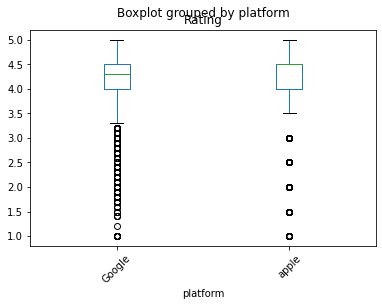

In [30]:
df.boxplot(by='platform', column =['Rating'], grid=False, rot=45, fontsize=10)


## Stage 3 - Modelling

### 3a. Hypothesis formulation

Our **Null hypothesis** is just:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).

The more interesting hypothesis is called the **Alternate hypothesis**:

**H<sub>alternative</sub>**: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform)

We're also going to pick a **significance level** of 0.05. 

### 3b. Getting the distribution of the data
 

In [31]:
# Create a subset of the column 'Rating' by the different platforms.
google = df[df['platform']== 'Google']['Rating']
apple = df[df['platform']== 'apple']['Rating']

In [36]:
# Check if the apple data are normally distributed!
apple_normal = stats.normaltest(apple)
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [34]:
# Do the same with the google data. 
google_normal = stats.normaltest(google)
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


Since the p-values is 0 for both tests,the data are not normally distributed. 


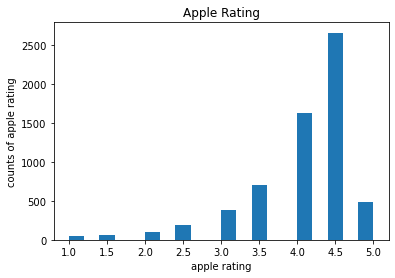

In [35]:
# Create a histogram of the apple reviews distribution
plt.hist(apple,bins =20)
plt.xlabel('apple rating')
plt.ylabel('counts of apple rating')
plt.title('Apple Rating')
plt.show()

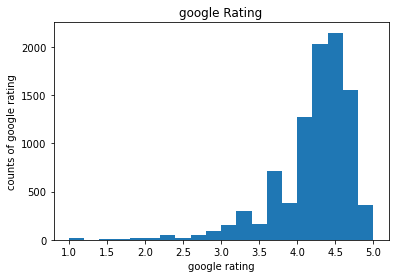

In [196]:
# Create a histogram of the google data
plt.hist(google,bins =20)
plt.xlabel('google rating')
plt.ylabel('counts of google rating')
plt.title('google Rating')
plt.show()

### 3c. Permutation test
Since the data aren't normally distributed, let's use a *non-parametric* test here. 

In [39]:
# Create a column called `Permutation1`, and assign to it the result of permuting (shuffling) the Rating column

df['Permutation1'] = np.random.permutation(df['Rating'])

df.groupby(['platform'])['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Google,9366.0,4.137049,0.608223,1.0,4.0,4.3,4.5,5.0
apple,6268.0,4.131445,0.619987,1.0,4.0,4.3,4.5,5.0


In [40]:
# Lets compare with the previous analytical summary:
df.groupby(['platform'])['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0


 The difference in the means for Permutation1 (0.001103) now looks hugely different to our observed difference of 0.14206. 
Lets do the permutation 10000 time and find the ditsribution of differnce between the mean of rating in google and apple in the permutation set!

In [43]:

difference = list()
# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' 
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
for i in range(10000):
    df['Permutation'] = np.random.permutation(df['Rating'])
    difference.append(df[df['platform'] =='Google']['Permutation'].mean() -  df[df['platform'] =='apple']['Permutation'].mean())

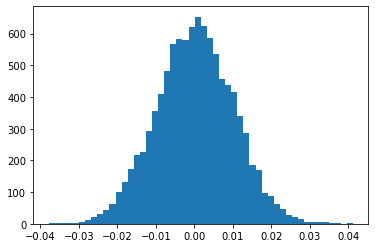

In [45]:
histo = plt.hist(difference,bins =50)

In [46]:
obs_difference = df[df['platform'] =='Google']['Rating'].mean() -  df[df['platform'] =='apple']['Rating'].mean()

obs_difference = abs(obs_difference)
print(obs_difference)

0.14206054745123442


## Stage 4 -  Evaluating and concluding


In [218]:

P_value = np.sum(np.absolute(np.array(difference)) >= obs_difference)
print(P_value)     

0


So actually, zero differences are at least as extreme as our observed difference!

So the p-value of our observed data is 0.  It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the Null.

We conclude that platform does impact on ratings. Specifically, we should advise our client to integrate **only Google Play** into their operating system interface. 